In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import Counter

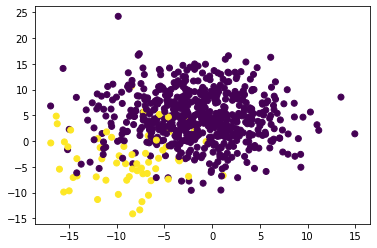

In [32]:
# Generate imbalanced dataset
X, y = make_blobs(n_samples=[600, 60], random_state=1, cluster_std=5)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [33]:
# Normal train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
Counter(y_train)

Counter({0: 451, 1: 44})

## Random Oversampling

In [34]:
# implement random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({0: 451, 1: 451})

In [35]:
# Logistic regression using random oversampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[131,  18],
       [  1,  15]])

In [37]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.9083473154362416

In [38]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.88      0.94      0.93      0.91      0.82       149
          1       0.45      0.94      0.88      0.61      0.91      0.83        16

avg / total       0.94      0.88      0.93      0.90      0.91      0.82       165



## SMOTE

In [10]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, ratio=1.0).fit_resample(
    X_train, y_train
)
Counter(y_resampled)

Counter({0: 451, 1: 451})

In [11]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.9150587248322148

In [13]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[133,  16],
       [  1,  15]])

In [14]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.89      0.94      0.94      0.91      0.83       149
          1       0.48      0.94      0.89      0.64      0.91      0.84        16

avg / total       0.94      0.90      0.93      0.91      0.91      0.83       165

